<h2 style="text-align: center;"><strong>Introduction to Linear Algebra</strong></h2>

*Linear Algebra is the branch of mathematics that studies vector spaces and the linear mappings (transformations) between them.
It focuses on objects like vectors, matrices, and systems of linear equations, and how they behave under operations such as addition, scaling, and transformation.*

---

In [67]:
import numpy as np
import matplotlib.pyplot as plt
import torch 
import tensorflow as tf

##### **Practical Illustration of Linear Algebra — Bank Robber Caught**

**Question**  

A bank robber has a **5-minute head start** and travels at **150 km/h**.  
A sheriff begins pursuit 5 minutes later at **180 km/h**.  

*Determine when and where the sheriff catches the robber, and visualize the pursuit.*

**Step-by-step solution**

**Step 1** — *Convert speeds to km/min*

> Convert from km/h to km/min:

$$
\text{Robber: } 150 \div 60 = 2.5 \text{ km/min}
$$

$$
\text{Sheriff: } 180 \div 60 = 3 \text{ km/min}
$$

**Step 2** — *Establish distance equations*

> Let \(t\) represent the time elapsed (in minutes) from when the robber starts.

- **Robber's distance:**  

$$
d_r = 2.5 \, t
$$

- **Sheriff's distance:**  

$$
d_s = 3 \, (t - 5)
$$

*Sheriff starts at \(t = 5\) minutes*

**Step 3** — *Solve for catch time*

> Set the distances equal **d_r = d_s**

$$
2.5t = 3(t - 5)
$$

$$
2.5t = 3t - 15
$$

$$
0.5t = 15
$$

$$
t = 30 \text{ minutes}
$$

**Step 4** — *Calculate catch distance*

$$
d_r = 2.5 \times 30 = 75 \text{ km}
$$

**Final answer**

> The sheriff catches the robber after **30 minutes** at a distance of **75 km** from the starting point.

**Plotting a Bank Robber Caught Scenario**

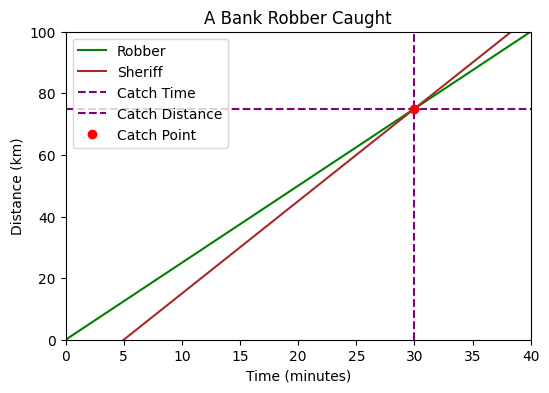

In [68]:
t = np.linspace(0, 40, 1000)
d_r = 2.5 * t         
d_s = 3 * (t - 5)     

fig, ax = plt.subplots(figsize=(6, 4))
ax.set_title('A Bank Robber Caught', fontsize=12)
ax.set_xlabel('Time (minutes)')
ax.set_ylabel('Distance (km)')

ax.set_xlim([0, 40])
ax.set_ylim([0, 100])

ax.plot(t, d_r, color='green', label='Robber')
ax.plot(t, d_s, color='brown', label='Sheriff')

ax.axvline(x=30, color='purple', linestyle='--', label='Catch Time')
ax.axhline(y=75, color='purple', linestyle='--', label='Catch Distance')
ax.plot(30, 75, 'ro', label='Catch Point')

ax.legend()
plt.show()

---

<h2 style="text-align: center;"><strong>Segment 1: Data Structures for Algebra</strong></h2>

* Scalars
* Vectors and Vector Transposition
* Norms and Unit Vectors
* Basis, Orthogonal, and Orthonormal Vectors
* Matrices
* Tensors in TensorFlow and PyTorch

---

## **Scalar**

A **scalar** is a single numerical value that represents a quantity. 
It has **magnitude only** and no direction. Scalars are often used in linear algebra 
and machine learning to scale vectors or matrices. 

**Examples:** `5`, `-3.2`, `0.75`

##### **Scalars (Rank 0 Tensors) in Base Python**

In [69]:
x = 25
x

25

In [70]:
type(x)

int

In [71]:
y = 3

In [72]:
py_sum = x + y
py_sum

28

In [73]:
type(py_sum)

int

In [74]:
x_float = 25.0
float_sum = x_float + y
float_sum

28.0

In [75]:
type(float_sum)

float

##### **Scalars in PyTorch**
* PyTorch and TensorFlow are the two most popular *automatic differentiation* libraries (a focus of the [*Calculus I*](https://github.com/jonkrohn/ML-foundations/blob/master/notebooks/3-calculus-i.ipynb) and [*Calculus II*](https://github.com/jonkrohn/ML-foundations/blob/master/notebooks/4-calculus-ii.ipynb) subjects in the *ML Foundations* series) in Python, itself the most popular programming language in ML.
* PyTorch tensors are designed to be pythonic, i.e., to feel and behave like NumPy arrays.
* The advantage of PyTorch tensors relative to NumPy arrays is that they easily be used for operations on GPU (see [here](https://pytorch.org/tutorials/beginner/examples_tensor/two_layer_net_tensor.html) for example).
* Documentation on PyTorch tensors, including available data types, is [here](https://pytorch.org/docs/stable/tensors.html).

In [76]:
x_pt = torch.tensor(25)
x_pt

tensor(25)

In [77]:
x_pt.shape

torch.Size([])

##### **Scalars in TensorFlow (version 2.0 or later)**

Tensors created with a wrapper, all of which [you can read about here](https://www.tensorflow.org/guide/tensor):  

* `tf.Variable`
* `tf.constant`
* `tf.placeholder`
* `tf.SparseTensor`

Most widely-used is `tf.Variable`, which we'll use here.

As with TF tensors, in PyTorch we can similarly perform operations, and we can easily convert to and from NumPy arrays.

Also, a full list of tensor data types is available [here](https://www.tensorflow.org/api_docs/python/tf/dtypes/DType).

In [78]:
x_tf = tf.Variable(25, dtype=tf.int16)
x_tf

<tf.Variable 'Variable:0' shape=() dtype=int16, numpy=25>

In [79]:
x_tf.shape

TensorShape([])

In [80]:
y_tf = tf.Variable(3, dtype=tf.int16)

In [81]:
x_tf + y_tf

<tf.Tensor: shape=(), dtype=int16, numpy=28>

In [82]:
tf_sum = tf.add(x_tf, y_tf)
tf_sum

<tf.Tensor: shape=(), dtype=int16, numpy=28>

*NumPy operations automatically convert tensors to NumPy arrays, and vice versa*

In [83]:
tf_sum.numpy()

np.int16(28)

In [84]:
type(tf_sum.numpy())

numpy.int16

In [85]:
tf_float = tf.Variable(25., dtype=tf.float16)
tf_float

<tf.Variable 'Variable:0' shape=() dtype=float16, numpy=25.0>

---

## **Vector**

A **vector** is an ordered collection of numbers that represents both **magnitude and direction**. 
Vectors are used to represent data points, features, or coordinates in space. 
In machine learning, each data sample is often represented as a vector. 

**Examples:** `[2, 3]`, `[0.5, -1.2, 4.0]`

##### **Vectors (Rank 1 Tensors) in NumPy**

In [86]:
x = np.array([25, 2, 5])
x

array([25,  2,  5])

In [87]:
len(x)

3

In [88]:
x.shape

(3,)

In [89]:
type(x)

numpy.ndarray

In [90]:
x[0]

np.int64(25)

In [91]:
type(x[0])

numpy.int64

**Vector Transposition**

*Transposing a regular 1-D array has no effect*

In [92]:
x_t = x.T
x_t

array([25,  2,  5])

In [93]:
x_t.shape

(3,)

*But it does we use nested "matrix-style" brackets*

In [94]:
y = np.array([[25, 2, 5]])
y

array([[25,  2,  5]])

In [95]:
y.shape

(1, 3)

*Transpose a matrix with a dimension of length 1, which is mathematically equivalent*

In [96]:
y_t = y.T
y_t

array([[25],
       [ 2],
       [ 5]])

*This is a column vector as it has 3 rows and 1 column*

In [97]:
y_t.shape

(3, 1)

*Column vector can be transposed back to original row vector*

In [98]:

y_t.T

array([[25,  2,  5]])

In [99]:
y_t.T.shape

(1, 3)

**Zero Vectors**

*Have no effect if added to another vector*

In [100]:
z = np.zeros(3)
z

array([0., 0., 0.])

##### **Vectors in PyTorch and TensorFlow**

In [101]:
x_pt = torch.tensor([25, 2, 5])
x_pt

tensor([25,  2,  5])

In [102]:
x_tf = tf.Variable([25, 2, 5])
x_tf

<tf.Variable 'Variable:0' shape=(3,) dtype=int32, numpy=array([25,  2,  5], dtype=int32)>

---

## **Norm**

A **norm** is a function that measures the **length or size** of a vector. 
Norms are widely used in machine learning for regularization, distance calculations, 
and gradient computations.

**Common types of norms:**
- **L1 norm (Manhattan norm):** sum of absolute values of vector components  
- **L2 norm (Euclidean norm):** square root of sum of squares of vector components  
- **Squared L2 norm:** sum of squares of vector components (without square root)  
- **Max norm (Infinity norm):** maximum absolute value among vector components


##### **$L^2$ Norm**

In [103]:
x

array([25,  2,  5])

In [104]:
(25**2 + 2**2 + 5**2)**(1/2)

25.573423705088842

In [105]:
np.linalg.norm(x)

np.float64(25.573423705088842)

*So, if units in this 3-dimensional vector space are meters, then the vector $x$ has a length of 25.6m*

##### **$L^1$ Norm**

In [106]:
x

array([25,  2,  5])

In [107]:
np.abs(25) + np.abs(2) + np.abs(5)

np.int64(32)

##### **Squared $L^2$ Norm**

In [108]:
x

array([25,  2,  5])

In [109]:
(25**2 + 2**2 + 5**2)

654

In [110]:
np.dot(x, x)

np.int64(654)

##### **Max Norm**

In [111]:
x

array([25,  2,  5])

In [112]:
np.max([np.abs(25), np.abs(2), np.abs(5)])

np.int64(25)

---

## **Orthogonal Vectors**

**Orthogonal vectors** are vectors that are **perpendicular** to each other. 
Mathematically, two vectors are orthogonal if their **dot product is zero**. 

**Properties and Use in ML:**  
- Orthogonal vectors have no correlation with each other.  
- They are used in linear algebra, PCA, and dimensionality reduction to form 
  independent feature directions.

In [113]:
i = np.array([1, 0])
i

array([1, 0])

In [114]:
j = np.array([0, 1])
j

array([0, 1])

In [115]:
np.dot(i, j)

np.int64(0)

---

## **Matrices**

**Matrices** are rectangular arrays of numbers arranged in rows and columns. 
They are used to represent collections of data, perform linear transformations, 
and solve systems of equations in mathematics and machine learning. 

**Examples:**  
`[[1 2 3]`
`[4 5 6]`
`[7 8 9]]`

Matrices can be added, multiplied, transposed, and used to perform linear transformations 
on vectors and other matrices.

##### **Matrices (Rank 2 Tensors) in NumPy**

In [116]:
X = np.array([[25, 2], [5, 26], [3, 7]])
X

array([[25,  2],
       [ 5, 26],
       [ 3,  7]])

In [117]:
X.shape

(3, 2)

In [118]:
X.size

6

*Select left column of matrix X (zero-indexed)*

In [119]:
X[:,0]

array([25,  5,  3])

*Select middle row of matrix X*

In [120]:

X[1,:]

array([ 5, 26])

*Another slicing-by-index example*

In [121]:
X[0:2, 0:2]

array([[25,  2],
       [ 5, 26]])

##### **Matrices in PyTorch**

In [122]:
X_pt = torch.tensor([[25, 2], [5, 26], [3, 7]])
X_pt

tensor([[25,  2],
        [ 5, 26],
        [ 3,  7]])

In [123]:
X_pt.shape

torch.Size([3, 2])

In [124]:
X_pt[1,:]

tensor([ 5, 26])

##### **Matrices in TensorFlow**

In [125]:
X_tf = tf.Variable([[25, 2], [5, 26], [3, 7]])
X_tf

<tf.Variable 'Variable:0' shape=(3, 2) dtype=int32, numpy=
array([[25,  2],
       [ 5, 26],
       [ 3,  7]], dtype=int32)>

In [126]:
tf.rank(X_tf)

<tf.Tensor: shape=(), dtype=int32, numpy=2>

In [127]:
tf.shape(X_tf)

<tf.Tensor: shape=(2,), dtype=int32, numpy=array([3, 2], dtype=int32)>

In [128]:
X_tf[1,:]

<tf.Tensor: shape=(2,), dtype=int32, numpy=array([ 5, 26], dtype=int32)>

---

## **Higher-Rank Tensors**

**Higher-rank tensors** are generalizations of vectors (rank 1) and matrices (rank 2) 
to multiple dimensions. A tensor of rank 3 or higher can be thought of as a multi-dimensional 
array of numbers. 

**Examples:**  
As an example, rank 4 tensors are common for images, where each dimension corresponds to:

1. Number of images in training batch, e.g., 32
2. Image height in pixels, e.g., 28 for [MNIST digits](http://yann.lecun.com/exdb/mnist/)
3. Image width in pixels, e.g., 28
4. Number of color channels, e.g., 3 for full-color images (RGB)

*Tensors are widely used in machine learning, especially in deep learning frameworks, 
to represent complex data structures like images, videos, and sequences.*

##### **4-Dimensional Tensor in PyTorch**

In [129]:
images_pt = torch.zeros([32, 28, 28, 3])
images_pt

tensor([[[[0., 0., 0.],
          [0., 0., 0.],
          [0., 0., 0.],
          ...,
          [0., 0., 0.],
          [0., 0., 0.],
          [0., 0., 0.]],

         [[0., 0., 0.],
          [0., 0., 0.],
          [0., 0., 0.],
          ...,
          [0., 0., 0.],
          [0., 0., 0.],
          [0., 0., 0.]],

         [[0., 0., 0.],
          [0., 0., 0.],
          [0., 0., 0.],
          ...,
          [0., 0., 0.],
          [0., 0., 0.],
          [0., 0., 0.]],

         ...,

         [[0., 0., 0.],
          [0., 0., 0.],
          [0., 0., 0.],
          ...,
          [0., 0., 0.],
          [0., 0., 0.],
          [0., 0., 0.]],

         [[0., 0., 0.],
          [0., 0., 0.],
          [0., 0., 0.],
          ...,
          [0., 0., 0.],
          [0., 0., 0.],
          [0., 0., 0.]],

         [[0., 0., 0.],
          [0., 0., 0.],
          [0., 0., 0.],
          ...,
          [0., 0., 0.],
          [0., 0., 0.],
          [0., 0., 0.]]],


        [[[0., 0.

##### **4-Dimensional Tensor in TensorFlow**

In [130]:
images_tf = tf.zeros([32, 28, 28, 3])
images_tf

<tf.Tensor: shape=(32, 28, 28, 3), dtype=float32, numpy=
array([[[[0., 0., 0.],
         [0., 0., 0.],
         [0., 0., 0.],
         ...,
         [0., 0., 0.],
         [0., 0., 0.],
         [0., 0., 0.]],

        [[0., 0., 0.],
         [0., 0., 0.],
         [0., 0., 0.],
         ...,
         [0., 0., 0.],
         [0., 0., 0.],
         [0., 0., 0.]],

        [[0., 0., 0.],
         [0., 0., 0.],
         [0., 0., 0.],
         ...,
         [0., 0., 0.],
         [0., 0., 0.],
         [0., 0., 0.]],

        ...,

        [[0., 0., 0.],
         [0., 0., 0.],
         [0., 0., 0.],
         ...,
         [0., 0., 0.],
         [0., 0., 0.],
         [0., 0., 0.]],

        [[0., 0., 0.],
         [0., 0., 0.],
         [0., 0., 0.],
         ...,
         [0., 0., 0.],
         [0., 0., 0.],
         [0., 0., 0.]],

        [[0., 0., 0.],
         [0., 0., 0.],
         [0., 0., 0.],
         ...,
         [0., 0., 0.],
         [0., 0., 0.],
         [0., 0., 0.]]],


   

---